In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from drift_qec import *
import seaborn as sns
sns.set_style("whitegrid")

/Users/yan/.miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


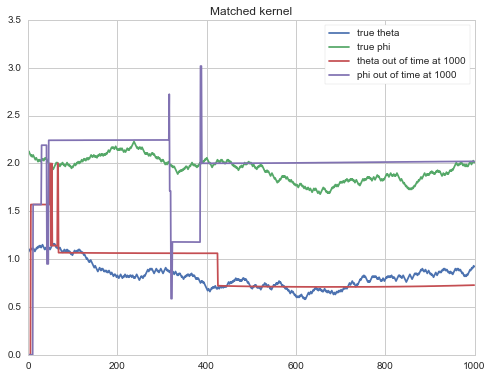

In [13]:
error_rate = 0.01
drift_rate = 0.001
# max_time = 1 / (0.06 * error_rate) ** 2
max_time = 1e3
channel = BrownianDephasingChannel2(error_rate=0.01, drift_rate=0.01, max_time=max_time)

est = BrownianDephasingEstimator2(grains=10000, widening_rate=0.01)
report = Report2()

simulate2(channel, est, report)

plt.figure(figsize=(8, 6))
plt.plot(channel.time[:report.exit_time], channel.theta[:report.exit_time], label="true theta")
plt.plot(channel.time[:report.exit_time], channel.phi[:report.exit_time], label="true phi")
plt.plot(report.time, report.theta_est, label="theta " + report.exit_status + " at " + str(report.exit_time))
plt.plot(report.time, report.phi_est, label="phi " + report.exit_status + " at " + str(report.exit_time))
plt.title("Matched kernel")
plt.legend(frameon=True)